# Адаптивный бустинг

## Описание проекта

В этом проекте основное внимание уделяется изучению алгоритмов AdaBoost и Gradient Boosting для анализа данных о грибах. Мы используем поиск по сетке (GridSearch) для оптимизации моделей, но основная цель — не создать идеальную предиктивную модель, а предоставить ценные инсайты о характеристиках грибов, которые определяют их съедобность.

## Цель проекта

Цель этого проекта заключается в углублённом понимании методов бустинга и применения поиска по сетке (GridSearchCV) для нахождения оптимальных гиперпараметров. Мы стремимся выявить ключевые характеристики грибов из предоставленных данных.

## Описание данных

Документ содержит описание 23 различных признаков грибов, которые влияют на их классификацию как съедобных или ядовитых. Все данные получены из семейства шампиньоновых и имеют богатую информацию об атрибутах, таких как форма и цвет шляпки, запах, форма ножки и другие показатели. Информация об атрибутах: 

- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
- bruises?: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a,descending=d,free=f,notched=n
- gill-spacing: close=c,crowded=w,distant=d
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
- stalk-shape: enlarging=e,tapering=t
- stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
- veil-type: partial=p,universal=u
- veil-color: brown=n,orange=o,white=w,yellow=y
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

## Исследование данных (EDA)

EDA (Exploratory Data Analysis) проводится для выявления закономерностей в данных и для лучшего понимания того, как различные признаки связаны с классификацией грибов. Важность признаков всесторонне исследуется на всех этапах анализа.

## AdaBoost и Gradient Boosting

Эти методы используются для обучения на данных, и исследуются их возможности в контексте увеличения точности модели. Особое внимание уделяется тому, как добавление слабых обучающихся влияет на изменчивость значимости признаков.

## GridSearchCV и кросс-валидация

Используя GridSearchCV, мы проводим автоматизированный подбор гиперпараметров для обеих моделей, добиваясь наилучших результатов. В проекте реализована многократная кросс-валидация для повышения надежности оценок.

## Оценка модели

Оценка моделей проводится с акцентом на точность и полноту при определении ключевых характеристик, определяющих съедобность грибов.

## Заключение

Проект позволяет углубиться в важные аспекты алгоритмов бустинга и применения методов поиска по сетке. На выходе мы получаем не только модель, но и общее руководство по важным признакам грибов.

---

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Данные

In [2]:
df = pd.read_csv("mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Исследование данных - EDA

<Axes: xlabel='class', ylabel='count'>

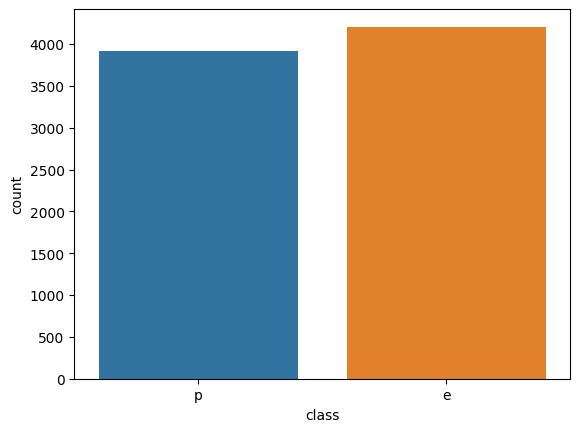

In [6]:
sns.countplot(data=df,x='class', hue='class')

In [7]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


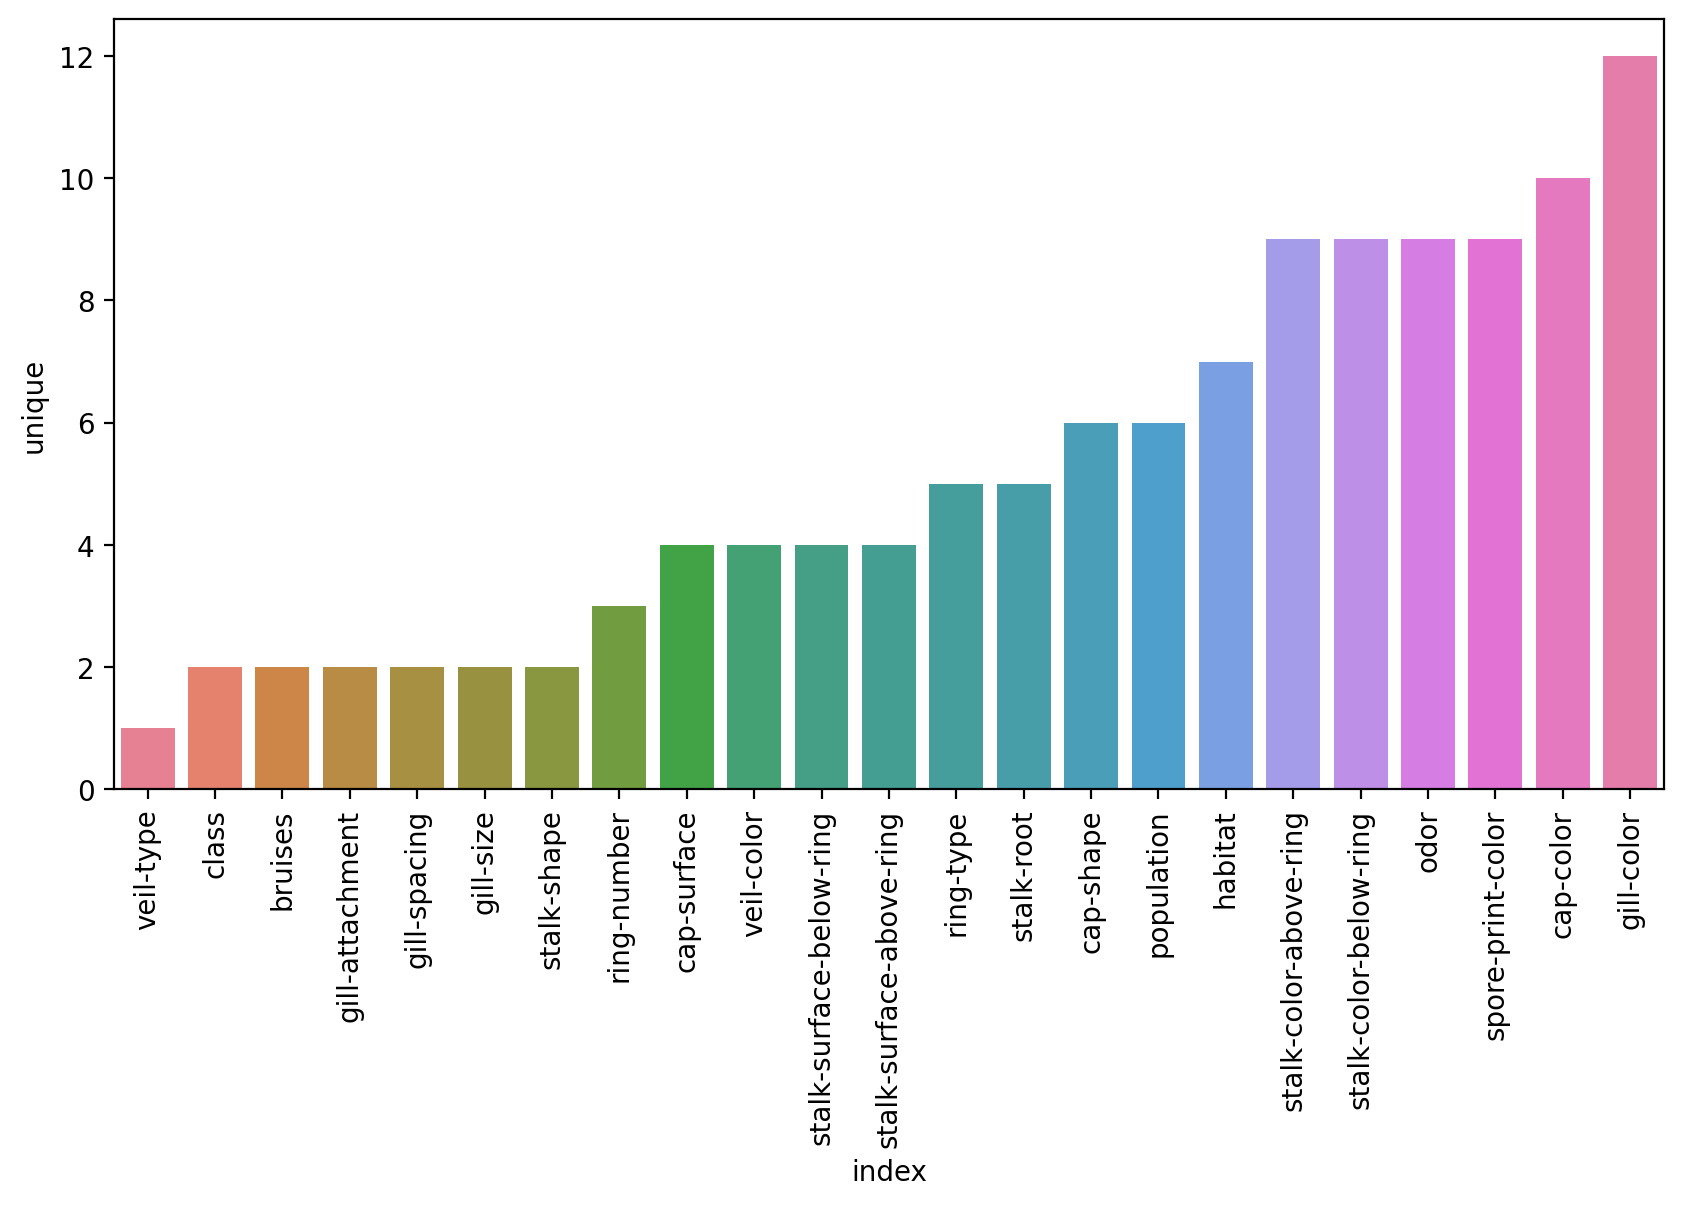

In [12]:
plt.figure(figsize=(10,5),dpi=200)
sns.barplot(data=df.describe().transpose().reset_index().sort_values('unique'),x='index',y='unique', hue='index')
plt.xticks(rotation=90);

# Разбиение на обучающий и тестовый наборы данных - Train Test Split

In [13]:
X = df.drop('class',axis=1)

In [14]:
X = pd.get_dummies(X,drop_first=True)

In [15]:
y = df['class']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

# Модель

In [18]:
from sklearn.ensemble import AdaBoostClassifier

In [19]:
model = AdaBoostClassifier(n_estimators=1)

In [20]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

## Оценка работы модели

In [21]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score

In [22]:
predictions = model.predict(X_test)

In [23]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], shape=(1219,), dtype=object)

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [25]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
model.feature_importances_.argmax()

np.int64(22)

In [27]:
X.columns[22]

'odor_n'

<Axes: xlabel='odor', ylabel='count'>

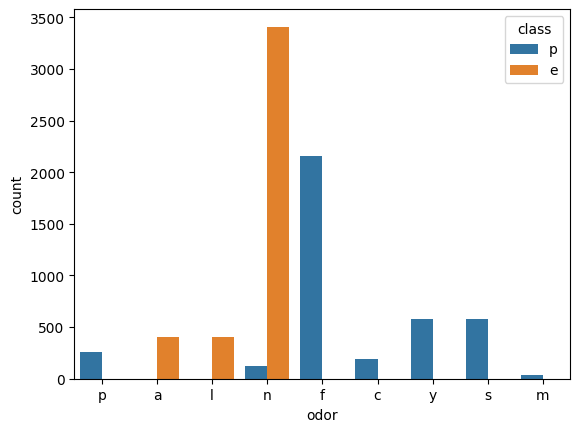

In [28]:
sns.countplot(data=df,x='odor',hue='class')

## Анализ производительности при добавлении weak learners.

In [29]:
len(X.columns)

95

In [30]:
error_rates = []

for n in range(1,96):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    
    error_rates.append(err)

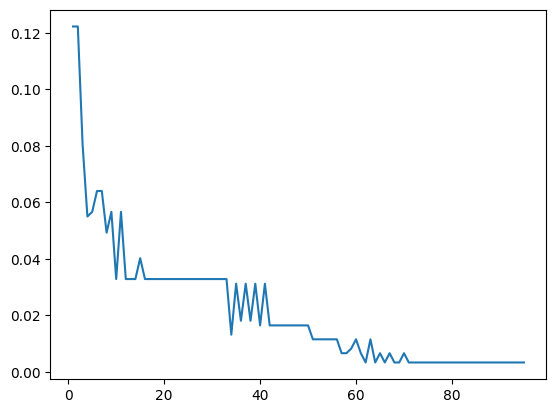

In [31]:
plt.plot(range(1,96),error_rates)

In [32]:
model

AdaBoostClassifier(n_estimators=95)

In [33]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.08758134, 0.15483051,
       0.03297374, 0.        , 0.07596867, 0.08553577, 0.        ,
       0.        , 0.        , 0.01449336, 0.04761456, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02261282, 0.        , 0.01960917, 0.        , 0.        ,
       0.04145947, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03716765, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02345876, 0.        , 0.     

In [34]:
feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Importance'])

In [35]:
feats

,Importance
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [36]:
imp_feats = feats[feats['Importance']>0]

In [37]:
imp_feats

,Importance
odor_c,0.087581
odor_f,0.154831
odor_l,0.032974
odor_n,0.075969
odor_p,0.085536
gill-spacing_w,0.014493
gill-size_n,0.047615
stalk-shape_t,0.022613
stalk-root_c,0.019609
stalk-surface-above-ring_k,0.041459


In [38]:
imp_feats = imp_feats.sort_values("Importance")

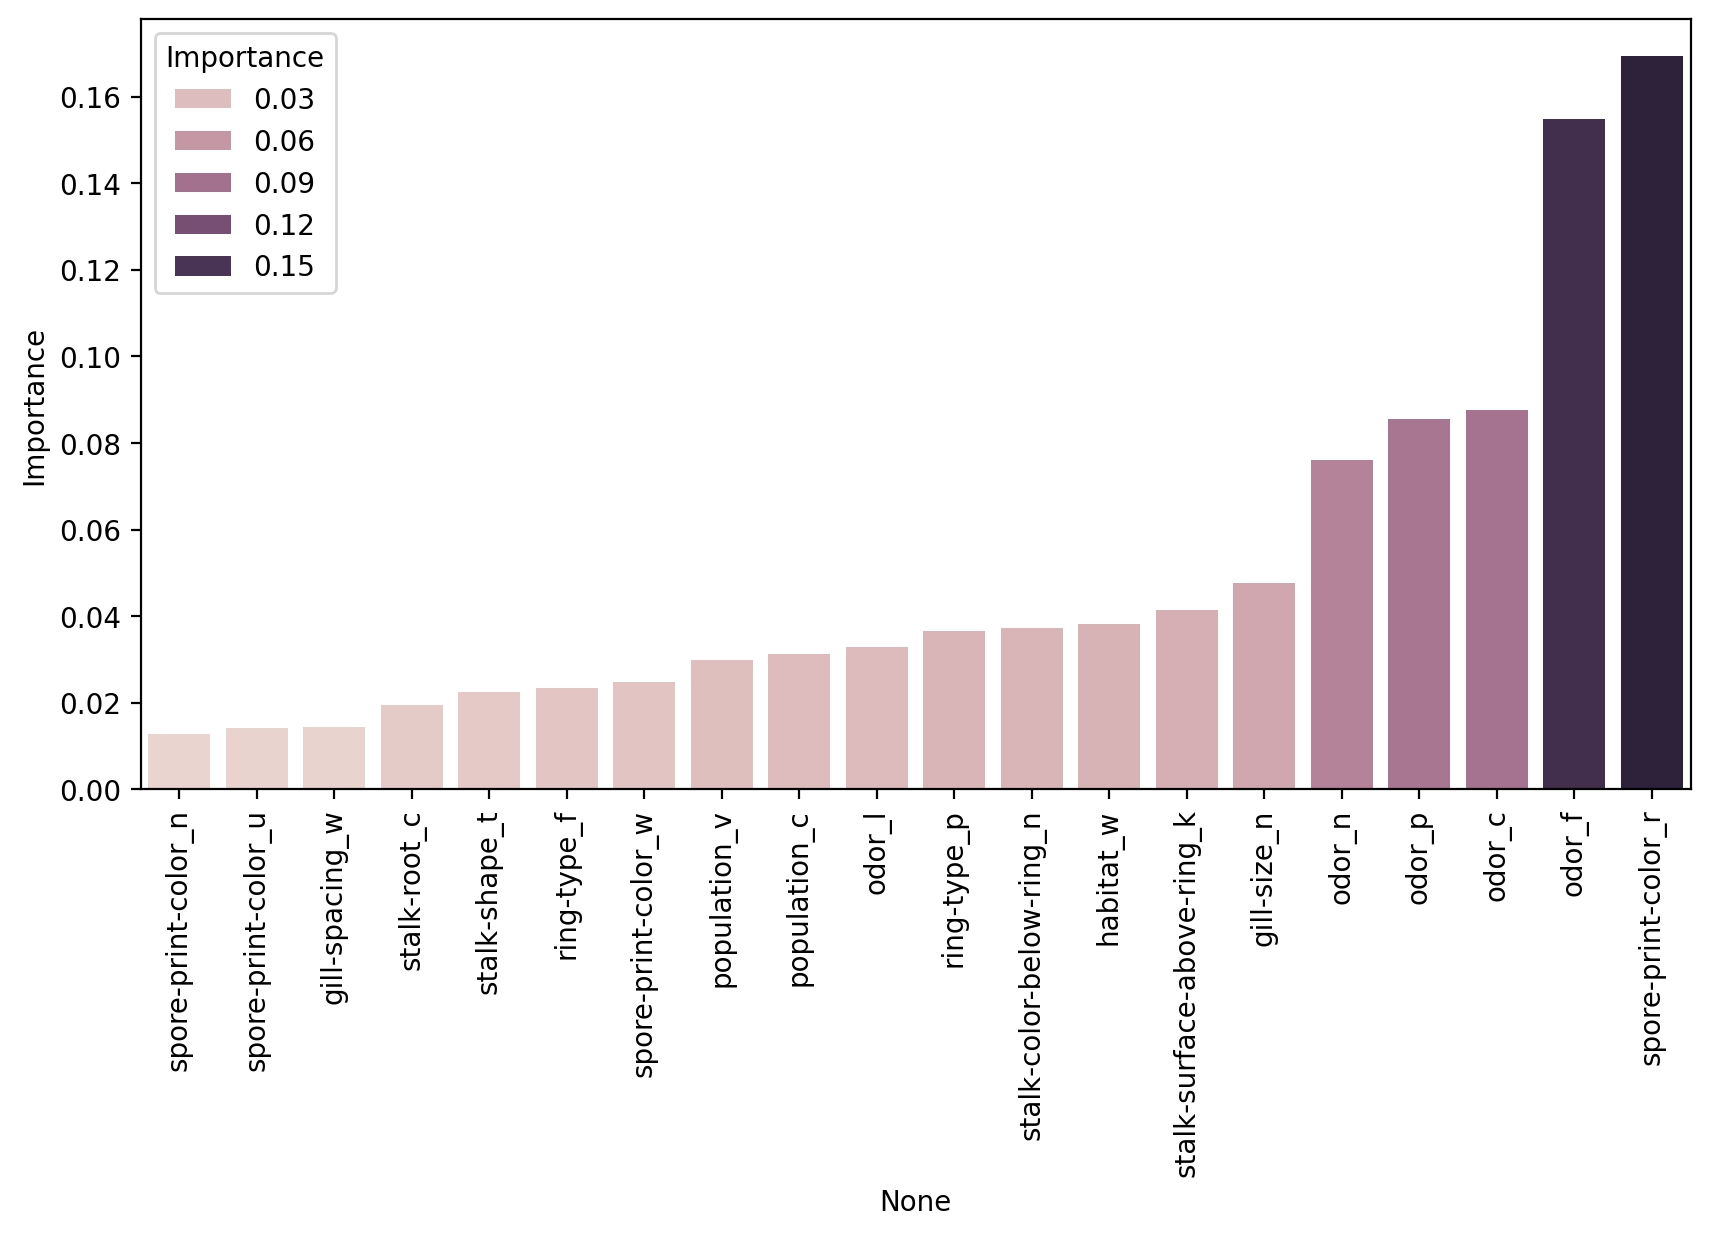

In [40]:
plt.figure(figsize=(10,5),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance', hue='Importance')

plt.xticks(rotation=90);

<Axes: xlabel='habitat', ylabel='count'>

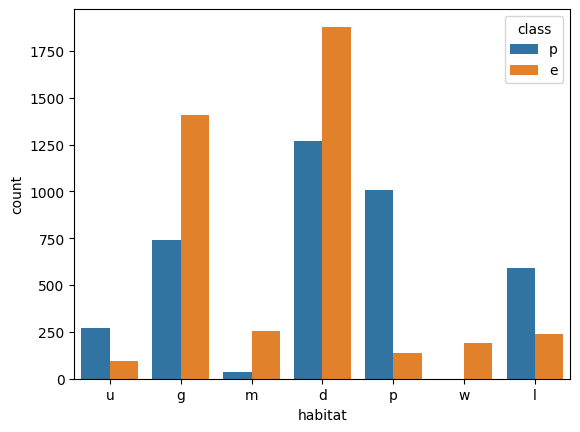

In [41]:
sns.countplot(data=df,x='habitat',hue='class')

## Отличная работа!

---